<a href="https://colab.research.google.com/github/xswzaq789/BeerWiki/blob/main/crowling_0506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0506 Crowling
- 제목 / 본문/ 링크 크롤링
  - https://wonhwa.tistory.com/10?category=996518
- 셀레니움 코랩 설치
  - https://pgh268400.tistory.com/286 
- 파이썬 워드 클라우드
  - https://doitgrow.com/34 
- konply 코랩 설치
  - https://pinggoopark.tistory.com/107 
- 크롬드라이버 설치
  - https://dhznsdl.tistory.com/21
- 코랩 한글 사용
  - https://durian9s-coding-tree.tistory.com/19 
- 형태소 등 추출
  - https://wikidocs.net/21707 
- 코랩 한글 폰트 불러오기 문제 해결
  - https://blog.naver.com/PostView.nhn?blogId=dsz08082&logNo=222021179448&redirect=Dlog&widgetTypeCall=true&directAccess=false 

In [1]:
import os
import sys
import urllib.request
import json
client_id = "ZLuPWwJ47OEWXSQAIlS4" # 발급받은 id 입력
client_secret = "BcmHs4QWvM" # 발급받은 secret 입력 
quote = input("검색어를 입력하세요: ") #검색어 입력받기
encText = urllib.parse.quote(quote)
display_num = input("크롤링할 수(100이하): ") #출력할 갯수 입력받기
url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display="+display_num# json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    #print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

body = response_body.decode('utf-8')
body

검색어를 입력하세요: 호가든 로제 리뷰
크롤링할 수(100이하): 25


'{\n"lastBuildDate": "Fri, 06 May 2022 14:22:34 +0900",\n"total": 2083,\n"start": 1,\n"display": 25,\n"items": [\n{\n"title": "<b>호가든 로제</b>/버드와이저/하이네켄 무알콜 맥주 3종 <b>리뷰</b>",\n"link": "https:\\/\\/blog.naver.com\\/jeong-won?Redirect=Log&logNo=222563018249",\n"description": "1번 타자는 <b>호가든 로제</b> 0.0 맥주다. 일반 버전이 보이지 않아서 피치 못하게 <b>로제</b>로 구입했는데 한국 시장에는 아직 진출하지 않았는지 판매자나 <b>리뷰</b>를 전혀 찾아볼 수 없었다. 첫인상으로는 칙-하고 개봉되는... ",\n"bloggername": "정어리의 사생활",\n"bloggerlink": "https://blog.naver.com/jeong-won",\n"postdate": "20211109"\n\n},\n{\n"title": "[수입캔맥주] <b>호가든</b>(Hoegaarden) <b>로제 리뷰</b>",\n"link": "https:\\/\\/blog.naver.com\\/taoti?Redirect=Log&logNo=222341190757",\n"description": "오늘 소개해드릴 맥주는 호가든 로제 입니다. 이름 호가든 로제 맥주 업소명 수입처 : 오비맥주(주)... 경험하는것으로 만족합니다. 0.0 : 다신 만나고 싶지 않음 이상 내돈내산 <b>호가든 로제 리뷰</b>를 마칩니다~ 뿅!",\n"bloggername": "내가 걸어가며 하는 이야기.",\n"bloggerlink": "https://blog.naver.com/taoti",\n"postdate": "20210507"\n\n},\n{\n"title": "<b>호가든 로제</b> 칼로리, 도수 (전용잔 기획세트)",\n"link": "https:\\/\\/blo

In [ ]:
# 반복문으로 encText 해결

In [2]:
# 불필요한 ""(큰따옴표)지워주기
body = body.replace('"','')

In [3]:
#블로그 제목만 뽑기
import re
titles = re.findall('title: (.*?),\nlink', body) #\n은 엔터의 의미
print('<<제목 모음>>')
print(titles)
print('총 제목 수: ',len(titles),'개')#제목갯수확인

<<제목 모음>>
['<b>호가든 로제</b>/버드와이저/하이네켄 무알콜 맥주 3종 <b>리뷰</b>', '[수입캔맥주] <b>호가든</b>(Hoegaarden) <b>로제 리뷰</b>', '<b>호가든 로제</b> 칼로리, 도수 (전용잔 기획세트)', 'BEST 5 추천 <b>리뷰</b> (츄하이, 버니니, <b>호가든로제</b>, 심술, 써머스비)', '[편의점맥주<b>리뷰</b>] <b>호가든 로제</b>', '평일 식사 <b>리뷰</b> :: 푸라닭치킨 순살 블랙투움바와 <b>호가든로제</b>... ', '#<b>호가든 로제 리뷰</b> #내돈내산', '세계맥주 : 벨기에 - <b>호가든로제</b> [<b>리뷰</b>]', '내돈내산 <b>호가든 로제</b> 캔맥주 <b>리뷰</b>', '[일상] 편의점 맥주 <b>리뷰</b>(<b>호가든 로제</b>, <b>호가든</b> 보타닉, 백양... ', '[<b>호가든 로제</b> 후기/<b>리뷰</b>] 맥주 추천/<b>호가든 로제</b> 가격, 맛', '은평구 진우동 쫄면 잔치국수 그리고 <b>호가든로제</b>', '<b>호가든 로제</b> / <b>호가든</b> 전용잔 <b>리뷰</b>', '술 못마시는 알쓰의 맥주 <b>리뷰</b> - <b>호가든 로제</b>', '4종 <b>리뷰</b>(<b>호가든</b>, <b>호가든로제</b>, 신상맥주 <b>호가든</b>포멜로... ', '[<b>호가든</b>] <b>호가든 로제</b> - 색깔도 예쁜 달달한 라즈베리 맥주', '<b>호가든 로제</b>캔 :: 맥주 독특해', '<b>호가든 로제</b>(Hoegaarden - Rosee) <b>리뷰</b> B291', '<b>호가든 로제</b> 달달한 라즈베리의 향연', '수입맥주 털어왔다: <b>호가든</b> 포멜로, <b>호가든 로제</b>, 데스페라도스... ', '노인과바다 코코넛밀크 동서울터미널 수레국화 <b>호가든로제</b>', '[<b>리뷰</b>] <b>호가든 로제</b> 포멜로 | 대왕 강추 맥주

In [4]:
#블로그 링크들 추출
links = re.findall('link: (.*?),\ndescription',body)
print('\n<<링크 모음>>')
print(links)
print('총 링크 수: ',len(links),'개')#링크갯수확인


<<링크 모음>>
['https:\\/\\/blog.naver.com\\/jeong-won?Redirect=Log&logNo=222563018249', 'https:\\/\\/blog.naver.com\\/taoti?Redirect=Log&logNo=222341190757', 'https:\\/\\/blog.naver.com\\/j_kokoko?Redirect=Log&logNo=222649276741', 'https:\\/\\/blog.naver.com\\/jejesua?Redirect=Log&logNo=222202069866', 'https:\\/\\/blog.naver.com\\/tare32?Redirect=Log&logNo=222501906586', 'https:\\/\\/blog.naver.com\\/tomakeitcount17?Redirect=Log&logNo=222183261205', 'https:\\/\\/blog.naver.com\\/heosd1121?Redirect=Log&logNo=222445602649', 'https:\\/\\/blog.naver.com\\/kjkk0516?Redirect=Log&logNo=222048766182', 'https:\\/\\/blog.naver.com\\/ckcnstla1?Redirect=Log&logNo=222521703025', 'https:\\/\\/blog.naver.com\\/tya03?Redirect=Log&logNo=222455283522', 'https:\\/\\/blog.naver.com\\/pinkcoups88?Redirect=Log&logNo=222219254190', 'https:\\/\\/blog.naver.com\\/ghwls222?Redirect=Log&logNo=222202587944', 'https:\\/\\/blog.naver.com\\/rudtlsdl369?Redirect=Log&logNo=222318716480', 'https:\\/\\/blog.naver.com\\/m0

In [5]:
# 링크를 다듬기 (필요없는 부분 제거 및 수정)
blog_links = []
for i in links:
    a = i.replace('\\','')
    b = a.replace('?Redirect=Log&logNo=','/')
    blog_links.append(b)

print(blog_links)
print('생성된 링크 갯수:',len(blog_links),'개')

['https://blog.naver.com/jeong-won/222563018249', 'https://blog.naver.com/taoti/222341190757', 'https://blog.naver.com/j_kokoko/222649276741', 'https://blog.naver.com/jejesua/222202069866', 'https://blog.naver.com/tare32/222501906586', 'https://blog.naver.com/tomakeitcount17/222183261205', 'https://blog.naver.com/heosd1121/222445602649', 'https://blog.naver.com/kjkk0516/222048766182', 'https://blog.naver.com/ckcnstla1/222521703025', 'https://blog.naver.com/tya03/222455283522', 'https://blog.naver.com/pinkcoups88/222219254190', 'https://blog.naver.com/ghwls222/222202587944', 'https://blog.naver.com/rudtlsdl369/222318716480', 'https://blog.naver.com/m0byd1ck/222506365040', 'https://blog.naver.com/goodstrength/222436054465', 'https://blog.naver.com/beautywi/222065649293', 'https://blog.naver.com/tjs2057/222427152991', 'https://blog.naver.com/aasx12347/221989682563', 'https://blog.naver.com/valueyang/222571860665', 'https://blog.naver.com/goroming22/222435986488', 'https://blog.naver.com/m

In [7]:
# 셀레니움
# 이 부분은 처음 한번만 실행하면 됌.(런타임 시간 동안)
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 979 kB 4.1 MB/s 
     |████████████████████████████████| 138 kB 53.1 MB/s 
     |████████████████████████████████| 359 kB 53.3 MB/s 
     |████████████████████████████████| 4.0 MB 49.0 MB/s 
     |████████████████████████████████| 55 kB 4.3 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-

In [8]:
# -*- coding: UTF-8 -*-
import time
from selenium import webdriver

In [9]:
#Colab에선 웹브라우저 창이 뜨지 않으므로 별도 설정한다.
 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [10]:
#본문 크롤링
import time
from selenium import webdriver
from bs4 import BeautifulSoup

#driver = webdriver.Chrome(os.path.abspath('chromedriver')) #또는 driver.exe 가있는 파일 위치 복사하여 입력
driver.implicitly_wait(3)

In [12]:
#블로그 링크 하나씩 불러서 크롤링
contents = []
for i in blog_links:
#블로그 링크 하나씩 불러오기
  driver.get(i)
  time.sleep(1)
  #블로그 안 본문이 있는 iframe에 접근하기
  driver.switch_to.frame("mainFrame")
#본문 내용 크롤링하기
  try:
    a = driver.find_element_by_css_selector('div.se-main-container').text
    contents.append(a)

  except:
    a = driver.find_element_by_css_selector('div#content-area').text
    contents.append(a)
  #print(본문: \n', a)




driver.quit() #창닫기
print("<<본문 크롤링이 완료되었습니다.>>")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  # This is added back by InteractiveShellApp.init_path()


<<본문 크롤링이 완료되었습니다.>>


In [14]:
# 제목, 블로그링크, 본문내용 Dataframe으로 만들기
# 굳이 실행 안 해도 됨 그냥 보기 편하라고 일단 작성
import pandas as pd
df = pd.DataFrame({'제목':titles, '링크':blog_links,'내용':contents})
df

,제목,링크,내용
0,<b>호가든 로제</b>/버드와이저/하이네켄 무알콜 맥주 3종 <b>리뷰</b>,https://blog.naver.com/jeong-won/222563018249,건강과 자기 관리에 대한 관심은 늘고\n강압적인 음주 문화는 사라져가면서 \n한국 ...
1,[수입캔맥주] <b>호가든</b>(Hoegaarden) <b>로제 리뷰</b>,https://blog.naver.com/taoti/222341190757,오늘 소개해드릴 맥주는 호가든 로제 입니다.\n이름\n호가든 로제\n맥주\n업소명\...
2,"<b>호가든 로제</b> 칼로리, 도수 (전용잔 기획세트)",https://blog.naver.com/j_kokoko/222649276741,요즘 맥주잔 모으는 취미에 푹 빠져서 \n마트에 장 보러 가면 가장 먼저 맥주코너\...
3,"BEST 5 추천 <b>리뷰</b> (츄하이, 버니니, <b>호가든로제</b>, 심...",https://blog.naver.com/jejesua/222202069866,친구들에게 명실상부 도또술로 불리는 나\n(도비 또 술먹어...)\n술을 많이 먹지...
4,[편의점맥주<b>리뷰</b>] <b>호가든 로제</b>,https://blog.naver.com/tare32/222501906586,#만cc녀의맥주리뷰\n#호가든로제\n#라즈베리맥주\n#벨기에맥주\n#오비맥주\n#핑...
5,평일 식사 <b>리뷰</b> :: 푸라닭치킨 순살 블랙투움바와 <b>호가든로제</b...,https://blog.naver.com/tomakeitcount17/2221832...,"푸라닭치킨 블랙투움바\n가격 : 18,900원(+배달료 1,000원)\n코로나 때문..."
6,#<b>호가든 로제 리뷰</b> #내돈내산,https://blog.naver.com/heosd1121/222445602649,안녕하세요 초보블로거 띠뚱입니다.\n오늘은 지금 마시고 있는 '호가든 맥주 로제맛'...
7,세계맥주 : 벨기에 - <b>호가든로제</b> [<b>리뷰</b>],https://blog.naver.com/kjkk0516/222048766182,안녕하세요! 맛있는 음식을 좋아하는 큰바위입니다:)\n오늘은 어떻게 하루를 잘 보내...
8,내돈내산 <b>호가든 로제</b> 캔맥주 <b>리뷰</b>,https://blog.naver.com/ckcnstla1/222521703025,안녕하세요~\n어제 급하게 집안 청소를 한시간 넘게하고\n너무 힘들고 갈증나서\n편...
9,"[일상] 편의점 맥주 <b>리뷰</b>(<b>호가든 로제</b>, <b>호가든</b...",https://blog.naver.com/tya03/222455283522,요즘 날이 너무 더워서 그런지\n날마다 맥주가 너무 땡겨요!\n당근거래 마치고 오는...


In [ ]:
# konply 설치

In [15]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists...
Reading package lists...
Building dependency tree...
Re

In [16]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [18]:
contents_str = "".join(contents)

In [19]:
okt = Okt()
normal = okt.normalize(contents_str)
nouns = okt.nouns(normal) # 명사만 추출
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [30]:
wordList = ['시트러스', '오렌지', '레몬', '라임', '귤', '유자', '캐러멜', '초콜릿', '커피', '호피', 'IPA', '꽃', '홉', 'IBU', '에일', '라거', '청량감', '페일', '붉은색', '과일', '비터', '몰티', '엔젤링', '바이젠', '상큼', '드래프트', '드라이', '드링커블', '바디', '자몽', '감귤', '탄산', '카보', '파이니', '송진', '세션', '밀', '필스너', '흑맥주', '페일', '에일', '묵직', '상쾌', '중성', '자극', '벌꿀', '꿀', '부드러움', '시큼', '몰트', '풍미', '와일드', '밍밍', '추천', '비추', '오비', '새콤', '무난', '산뜻', '향긋', '순한']

In [24]:
print(words)

['건강', '자기', '관리', '대한', '관심', '강압', '음주', '문화', '한국', '주류', '시장', '알콜', '맥주', '인기', '유례', '맥주', '알코올', '의문', '제기', '음료', '대체', '맥주', '자체', '청량감', '의문', '의문', '다만', '예전', '브랜드', '불문', '거의', '모든', '알콜', '맥주', '감히', '맥주', '이름', '악명', '사람', '보기', '최근', '판매', '제품', '예전', '실제', '맥주', '싱크로', '소문', '체중', '관리', '맥주', '인기', '몇몇', '브랜드', '제품', '라이', '알콜', '맥주', '용어', '통용', '제목', '사실', '우리', '얘기', '대부분', '제품', '알콜', '알콜', '맥주', '하이네켄', '미량', '알코올', '함유', '호가든', '로제', '수치', '알코올', '함유', '추정', '라벨', '공식', '사이트', '정보', '확언', '어려움', '대한민국', '세법', '알콜', '알콜', '맥주', '대한', '규정', '알콜', '맥주', '알코올', '미만', '알콜', '맥주', '알코올', '함량', '전혀', '제품', '주류', '기준', '때문', '탄산음료', '분류', '온라인', '구매', '어린이', '식생활', '안전', '관리', '특별법', '미성년', '판매', '금지', '비교', '위해', '구입', '호가든', '버드와이저', '하이네켄', '벨기에', '미국', '네덜란드', '뿌리', '브랜드', '생산', '각각', '벨기에', '한국', '싱가폴', '표기', '기준', '정가', '루피', '호가든', '버드와이저', '하이네켄', '순의', '가격', '이제', '냉장', '보관', '맥주', '하나', '굴욕', '알콜', '맥주', '역사', '뒤엎', '확인', '타자', '호가든', '로제', '맥주', '일반', '버전', '보

In [31]:
num = 0
newList = []
for i in range(len(wordList)):
    for j in range(len(words)):
        if wordList[i] == words[j]:
            newList.append(words[j])
print(newList)
wordC = Counter(newList)
print(wordC)

['오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '오렌지', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '레몬', '커피', '라거', '라거', '청량감', '청량감', '청량감', '청량감', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '과일', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '상큼', '바디', '바디', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '자몽', '탄산', '탄산', '탄산', '탄산', '탄산', '탄산', '탄산', '탄산', '탄산', '필스너', '필스너', '필스너', '자극', '벌꿀', '밍밍', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추천', '추

In [32]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155903 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()



fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.


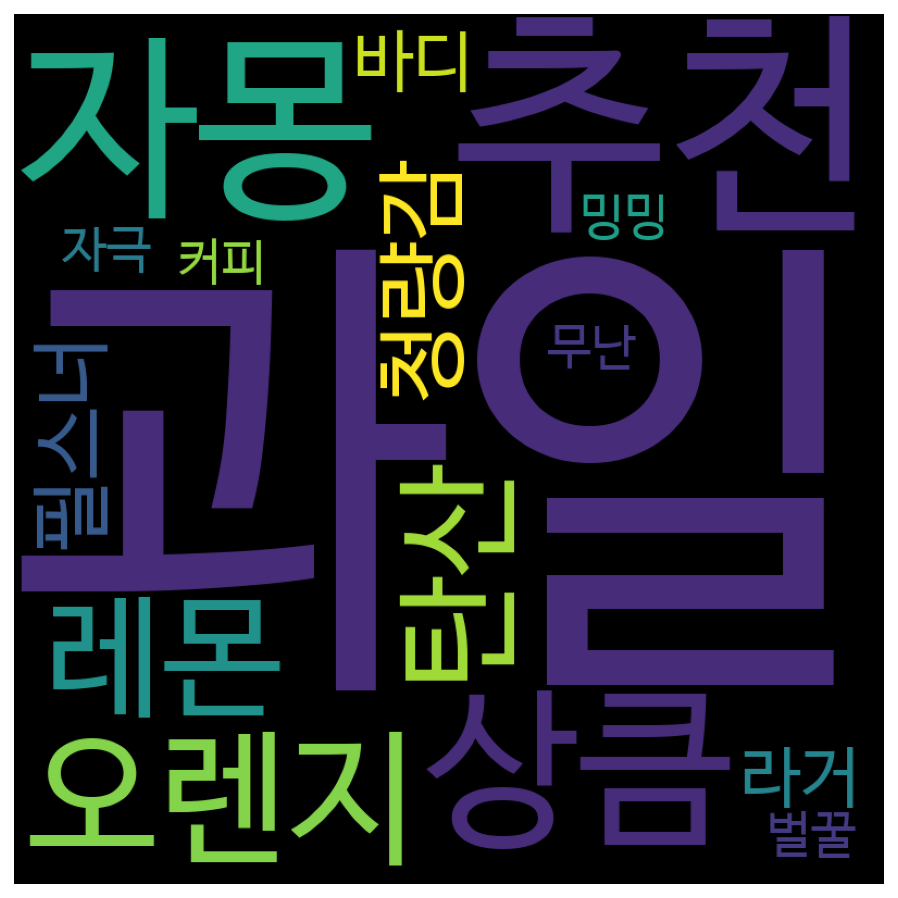

In [42]:
wc = WordCloud(font_path='NanumBarunGothic', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(wordC)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(gen)

In [39]:
import cv2
cv2.imwrite('/content/drive/MyDrive/wodCloud/aa.png',gen)

TypeError: ignored